# WeatherPy
----
* A random sampling cities around the world show variations in temperature.  We can also note the distribution of habitable landmass which results in gaps of data beyond the 60th parallel south.

### Analysis

* The weather data was collected near the spring equinox. The temperatures are highest near the equator and drop lower as we move to higher latitudes both N and S. The lowest temperatures are near the arctic. If we had more southern hemisphere data we would probably see the same trend.

* The highest humidity is found near the equator with the lowest humidity found in mid latitude regions just north and south of the equator which corresponds with global areas of desert between 15-30 degrees latitudes.

* Cloud cover seems to have no trend with latitude.  The grouping of data along 90%, 75%, 20% and 0% are probably due to how cloudiness is measured or estimated.

* Extreme windspeeds seem to be found in the extreme latitudes. If we had any cities south of -60 latitude we would probably see the same extreme wind speeds. There is also a lull in wind speed near the equator.

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_object = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_object.city_name
    country = city_object.country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
    
# Print the city count to confirm sufficient count
len(cities)

594

## Create Dataframe for cities and data

In [104]:
# Make the cities into a dataframe with additional columns for lat/long, temp, humidity, etc
weather_data = pd.DataFrame({"City": cities, "Country": countries})
weather_data["Latitude"] = ""
weather_data["Longitude"] = ""
weather_data["Temperature (F)"] = ""
weather_data["Humidity (%)"] = ""
weather_data["Cloudiness (%)"] = ""
weather_data["Wind Speed (mph)"] = ""
weather_data.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tautira,pf,,,,,,
1,cape town,za,,,,,,
2,hermanus,za,,,,,,
3,punta arenas,cl,,,,,,
4,vaini,to,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
url = "http://api.openweathermap.org/data/2.5/weather?"

record = 1
set = 1

print("Beginning Data Retrieval")
print("-------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in weather_data.iterrows():

    # get location from df
    location = row['City'] + ',' + row["Country"]

    # Build query URL
    query_url = url + "APPID=" + api_key + "&q=" + location + "&units=imperial"
    
    # Make API request
    print(f"Processing Record {record} of Set {set}, {location}.")
    weather_response = requests.get(query_url).json()
        
    try:    
        weather_data.loc[index, 'Latitude'] = weather_response["coord"]["lat"]
        weather_data.loc[index, 'Longitude'] = weather_response["coord"]["lon"]
        weather_data.loc[index, 'Temperature (F)'] = weather_response["main"]["temp"]
        weather_data.loc[index, 'Humidity (%)'] = weather_response["main"]["humidity"]
        weather_data.loc[index, 'Cloudiness (%)'] = weather_response["clouds"]["all"]
        weather_data.loc[index, 'Wind Speed (mph)'] = weather_response["wind"]["speed"]

    except (KeyError, IndexError):
        print("City not found... skipping.")
        weather_data.loc[index, 'City'] = "none"

  
    if record < 50:
        record += 1
    else:
        record = 1
        set += 1
        print(f"Waiting to start Set {set}")
        time.sleep(60)
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1, tautira,pf.
Processing Record 2 of Set 1, cape town,za.
Processing Record 3 of Set 1, hermanus,za.
Processing Record 4 of Set 1, punta arenas,cl.
Processing Record 5 of Set 1, vaini,to.
Processing Record 6 of Set 1, hobart,au.
Processing Record 7 of Set 1, alofi,nu.
Processing Record 8 of Set 1, hambantota,lk.
Processing Record 9 of Set 1, jamestown,sh.
Processing Record 10 of Set 1, senneterre,ca.
Processing Record 11 of Set 1, none,pf.
City not found... skipping.
Processing Record 12 of Set 1, oyem,ga.
Processing Record 13 of Set 1, tiksi,ru.
Processing Record 14 of Set 1, none,mx.
City not found... skipping.
Processing Record 15 of Set 1, meulaboh,id.
Processing Record 16 of Set 1, dickinson,us.
Processing Record 17 of Set 1, rikitea,pf.
Processing Record 18 of Set 1, jalu,ly.
Processing Record 19 of Set 1, hasaki,jp.
Processing Record 20 of Set 1, maldonado,uy.
Processing Record 21 of Set 1, saskylakh,

Processing Record 24 of Set 4, zemio,cf.
Processing Record 25 of Set 4, thunder bay,ca.
Processing Record 26 of Set 4, aljezur,pt.
Processing Record 27 of Set 4, samusu,ws.
City not found... skipping.
Processing Record 28 of Set 4, bayeux,fr.
Processing Record 29 of Set 4, bathsheba,bb.
Processing Record 30 of Set 4, okandja,ga.
City not found... skipping.
Processing Record 31 of Set 4, balabac,ph.
Processing Record 32 of Set 4, oktyabrskoye,ru.
Processing Record 33 of Set 4, harrison,us.
Processing Record 34 of Set 4, tabas,ir.
Processing Record 35 of Set 4, cidreira,br.
Processing Record 36 of Set 4, port alfred,za.
Processing Record 37 of Set 4, karamea,nz.
City not found... skipping.
Processing Record 38 of Set 4, labuhan,id.
Processing Record 39 of Set 4, los llanos de aridane,es.
Processing Record 40 of Set 4, lorengau,pg.
Processing Record 41 of Set 4, willowmore,za.
Processing Record 42 of Set 4, nikolskoye,ru.
Processing Record 43 of Set 4, paamiut,gl.
Processing Record 44 of 

Processing Record 45 of Set 7, martapura,id.
Processing Record 46 of Set 7, graaff-reinet,za.
Processing Record 47 of Set 7, ilulissat,gl.
Processing Record 48 of Set 7, sao filipe,cv.
Processing Record 49 of Set 7, alyangula,au.
Processing Record 50 of Set 7, lienz,at.
Waiting to start Set 8
Processing Record 1 of Set 8, chumikan,ru.
Processing Record 2 of Set 8, lakes entrance,au.
Processing Record 3 of Set 8, nagorsk,ru.
Processing Record 4 of Set 8, cabo san lucas,mx.
Processing Record 5 of Set 8, katsuura,jp.
Processing Record 6 of Set 8, charters towers,au.
Processing Record 7 of Set 8, itoman,jp.
Processing Record 8 of Set 8, voh,nc.
Processing Record 9 of Set 8, tumannyy,ru.
City not found... skipping.
Processing Record 10 of Set 8, comodoro rivadavia,ar.
Processing Record 11 of Set 8, sinnamary,gf.
Processing Record 12 of Set 8, berdigestyakh,ru.
Processing Record 13 of Set 8, balimo,pg.
City not found... skipping.
Processing Record 14 of Set 8, santa isabel,us.
City not found

Processing Record 15 of Set 11, swan river,ca.
Processing Record 16 of Set 11, mayskiy,ru.
Processing Record 17 of Set 11, kavaratti,in.
Processing Record 18 of Set 11, camocim,br.
Processing Record 19 of Set 11, baramula,in.
Processing Record 20 of Set 11, bilibino,ru.
Processing Record 21 of Set 11, damavand,ir.
Processing Record 22 of Set 11, yirol,sd.
City not found... skipping.
Processing Record 23 of Set 11, ostersund,se.
Processing Record 24 of Set 11, suamico,us.
Processing Record 25 of Set 11, manadhoo,mv.
Processing Record 26 of Set 11, coos bay,us.
Processing Record 27 of Set 11, chapais,ca.
Processing Record 28 of Set 11, carauari,br.
Processing Record 29 of Set 11, aklavik,ca.
Processing Record 30 of Set 11, inhambane,mz.
Processing Record 31 of Set 11, fonte boa,br.
Processing Record 32 of Set 11, aswan,eg.
Processing Record 33 of Set 11, ulladulla,au.
Processing Record 34 of Set 11, barbar,sd.
City not found... skipping.
Processing Record 35 of Set 11, baghdad,iq.
Proces

## Clean up the dataframe

In [110]:
weather_df = weather_data[weather_data["City"] != "none"]
weather_df.reset_index()
weather_df.count()

City                521
Country             521
Latitude            521
Longitude           521
Temperature (F)     521
Humidity (%)        521
Cloudiness (%)      521
Wind Speed (mph)    521
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
weather_df['Latitude'] = pd.to_numeric(weather_df['Latitude'])
weather_df['Longitude'] = pd.to_numeric(weather_df['Longitude'])
weather_df['Temperature (F)'] = pd.to_numeric(weather_df['Temperature (F)'])
weather_df['Humidity (%)'] = pd.to_numeric(weather_df['Humidity (%)'])
weather_df['Cloudiness (%)'] = pd.to_numeric(weather_df['Cloudiness (%)'])
weather_df['Wind Speed (mph)'] = pd.to_numeric(weather_df['Wind Speed (mph)'])
weather_df.dtypes

C:\Users\caeeb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\caeeb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\caeeb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

City                 object
Country              object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)          int64
Cloudiness (%)        int64
Wind Speed (mph)    float64
dtype: object

In [123]:
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tautira,pf,-17.73,-149.15,87.35,66,75,16.11
1,cape town,za,-33.93,18.42,65.35,88,0,13.87
2,hermanus,za,-34.42,19.24,64.78,94,56,2.68
3,punta arenas,cl,-53.16,-70.91,53.24,54,75,28.86
4,vaini,to,-21.20,-175.20,82.40,69,75,12.75
5,hobart,au,-42.88,147.33,55.83,41,20,24.16
6,alofi,nu,-19.06,-169.92,84.20,58,44,16.11
7,hambantota,lk,6.12,81.12,73.40,100,0,3.36
8,jamestown,sh,-15.94,-5.72,76.99,100,32,17.45
9,senneterre,ca,48.39,-77.24,23.00,35,20,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
* The weather data was collected near the spring equinox.
* The temperatures are highest near the equator and drop lower as we move to higher latitudes both N and S.
* The lowest temperatures are near the arctic.  If we had more southern hemisphere data we would probably see the same trend.

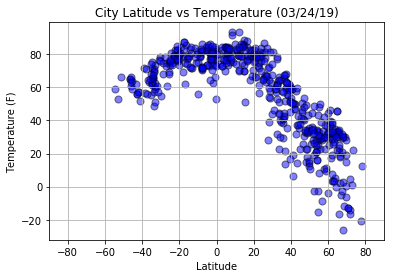

In [151]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], 
            marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Temperature (03/24/19)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("output_data/temperature.png")

#### Latitude vs. Humidity Plot
* Globally there is a mid latitude trend to deserts around 30 degrees N and S.
* http://www.mbgnet.net/sets/desert/where.htm
* I expected to see a region of low humidity around 30 degrees N and S.
* the regions with the most extreme low humidity are near 30 degrees.
* The region with the highest humidity appears to be near the equator which is also consistent with global climate trends.

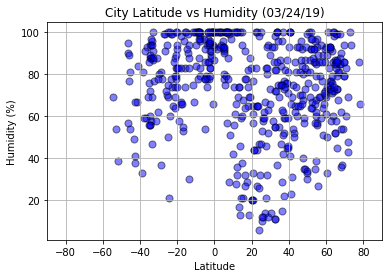

In [152]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], 
            marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (03/24/19)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("output_data/humidity.png")

#### Latitude vs. Cloudiness Plot
* The grouping of data along 90%, 75%, 20% and 0% are probably due to how cloudiness is measured or estimated.
* Cloud cover seems to have no trend with latitude.

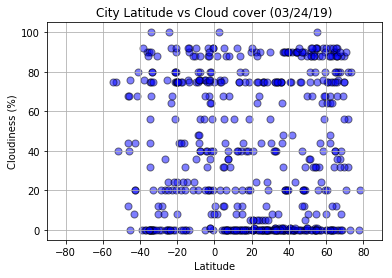

In [153]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], 
            marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloud cover (03/24/19)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("output_data/clouds.png")

#### Latitude vs. Wind Speed Plot
* Extreme windspeeds seem to be found in the extreme latitudes.  If we had any cities south of -60 latitude we may see the same extreme wind speeds.
* There is also a lull near the equator.

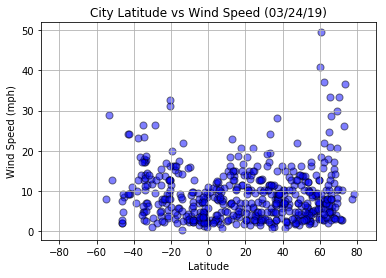

In [154]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], 
            marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (03/24/19)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("output_data/wind.png")

## Distribution of weather stations
* our method discovered none of the weather stations beyond the 60th parallel south
* we could force the reading of a few antarctic weather stations to even out the plots a little
* the northern hemisphere has 68% of the world's landmass which may be why we have more cities plotted in the north

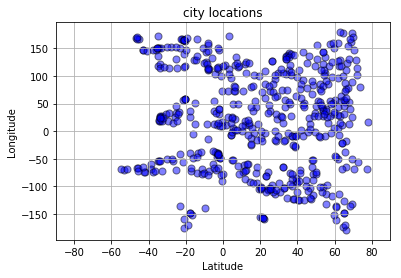

In [156]:
plt.scatter(weather_df["Latitude"], weather_df["Longitude"], 
            marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("city locations")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("output_data/location.png")